# Load libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt  # for graphs
# Modules for Model Evaluation
from sklearn.cross_validation import train_test_split # for creating train and test datasets
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score  # for cross-validation
from sklearn.metrics import roc_curve, auc
### Modules for supervised ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

D:\Users\eric.benhamou\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# import data

In [2]:
#IMPORT DATA 
db_6play_original=pd.read_csv("Base 6play.csv", delimiter=";", decimal=",")
db_emissions=pd.read_csv("EMISSIONS.csv", delimiter=";", decimal=",")

D:\Users\eric.benhamou\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Users\eric.benhamou\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
db_6play = db_6play_original.copy()
db_6play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824900 entries, 0 to 2824899
Data columns (total 19 columns):
uid                              object
device                           object
age                              object
gender                           object
loginprovider                    object
year                             int64
month                            int64
recence                          int64
rupture                          int64
dureerelation                    float64
frequence_utilisation            int64
completion_rate_moy_mens         object
preroll_rejection_freq           int64
duree_moy_pgms_visionns          object
duree_inter_session              object
conso_par_mois_programme         int64
part_temps_programme_par_mois    object
NBRE_PROG_CONSOMMES              int64
COHORTE                          object
dtypes: float64(1), int64(8), object(10)
memory usage: 409.5+ MB


# convert types

In [4]:
columns_to_numeric = [
'age',
'dureerelation',
'completion_rate_moy_mens',
'duree_moy_pgms_visionns',         
'duree_inter_session',            
'part_temps_programme_par_mois'    
]
    
for column in columns_to_numeric:
    db_6play[column] = pd.to_numeric( db_6play[column], errors='coerce' )
    print("converted ", column, " succesfully!")
                                       

converted  age  succesfully!
converted  dureerelation  succesfully!
converted  completion_rate_moy_mens  succesfully!
converted  duree_moy_pgms_visionns  succesfully!
converted  duree_inter_session  succesfully!
converted  part_temps_programme_par_mois  succesfully!


In [5]:
columns_to_string = [
'uid',
'device',
'gender',
'loginprovider',
'COHORTE',
]
for column in columns_to_string:
    db_6play[column].astype('str')
    print("converted ", column, " succesfully!")


converted  uid  succesfully!
converted  device  succesfully!
converted  gender  succesfully!
converted  loginprovider  succesfully!
converted  COHORTE  succesfully!


In [6]:
db_6play.fillna(0, inplace=True)
#db_6play.head(3)

In [7]:
db_6play = db_6play.sort_values(['uid', 'year','month'])

# We now groupby uid to have the last row and additional data: we count the number of period, the different duree_intee_session

In [8]:
from datetime import datetime
start = datetime.now()
new_data_frame = db_6play[:100000].copy().groupby('uid').last()
print("This took {} sec", datetime.now() - start)

This took  0:00:14.484438


In [9]:
initial_size = 100000
total_size = len(np.unique(db_6play[:initial_size]['uid'].values))
print(total_size)
print(new_data_frame.shape[0])

32021
32021


In [10]:
db_6play.head(10)

,uid,device,age,gender,loginprovider,year,month,recence,rupture,dureerelation,frequence_utilisation,completion_rate_moy_mens,preroll_rejection_freq,duree_moy_pgms_visionns,duree_inter_session,conso_par_mois_programme,part_temps_programme_par_mois,NBRE_PROG_CONSOMMES,COHORTE
0,00003b73e36d4bc294aaa7bfed444c0e,and,25.0,f,site,2016,12,83,1,725.991638,1,0.0,0,1442.0,0.0,224,100.0,1,DEC2015
1,00003b73e36d4bc294aaa7bfed444c0e,and,25.0,f,site,2017,1,83,1,725.991638,1,100.0,0,62.0,7.0,6893,100.0,1,DEC2015
2,0000723c120e4431a11d1adbc62f5d70,and,44.0,f,site,2016,10,150,1,294.993042,22,0.0,0,0.0,4.0,1,0.0,5,OCT2016
3,0000723c120e4431a11d1adbc62f5d70,and,44.0,f,site,2016,11,150,1,294.993042,1,0.0,1,59.0,1.0,0,0.0,1,OCT2016
4,0000882213654f18a7d642bd5009cc6f,and,45.0,m,site,2016,10,127,1,298.996521,1,0.0,1,72.0,0.0,0,0.0,1,MAI2016
5,0000882213654f18a7d642bd5009cc6f,and,45.0,m,site,2016,11,127,1,298.996521,1,0.0,1,2452.0,51.0,0,0.0,1,MAI2016
6,000098845644408882864e4f394d7b12,web,22.0,f,site,2016,10,0,0,804.992371,46,0.0,0,0.0,1.0,17809,0.0,6,NOV2015
7,000098845644408882864e4f394d7b12,and,22.0,f,site,2016,11,0,0,804.992371,12,0.0,0,0.0,2.0,3798,0.0,4,NOV2015
8,000098845644408882864e4f394d7b12,and,22.0,f,site,2016,12,0,0,804.992371,18,0.0,0,204.0,3.0,8557,0.0,2,NOV2015
9,000098845644408882864e4f394d7b12,web,22.0,f,site,2017,1,0,0,804.992371,5,0.0,0,136.0,17.0,6539,0.0,3,NOV2015


In [11]:
#np.column_stack(( new_data_frame.columns.values, np.arange(len(new_data_frame.columns))))

# remove categorical

In [12]:
# we check the version of pandas
if float(pd.__version__[:4])< 0.22:
    new_data_frame = new_data_frame.drop('COHORTE', axis = 1)
else:
    new_data_frame = new_data_frame.drop( columns=['COHORTE'])

In [13]:
print( 'shape', new_data_frame.shape )
categorical_columns = ['device','gender','loginprovider']
for column in categorical_columns:
    print('\n--- ', column, '\n: ', new_data_frame[column].value_counts())

shape (32021, 17)

---  device 
:  web    15911
and     6853
ipa     4926
iph     4331
Name: device, dtype: int64

---  gender 
:  f    23170
m     8828
u       21
N        2
Name: gender, dtype: int64

---  loginprovider 
:  site          30579
facebook       1251
googleplus      191
Name: loginprovider, dtype: int64


In [14]:
new_data_frame = new_data_frame[ (new_data_frame.gender == 'f') | (new_data_frame.gender == 'm')]
new_data_frame.columns

Index(['device', 'age', 'gender', 'loginprovider', 'year', 'month', 'recence',
       'rupture', 'dureerelation', 'frequence_utilisation',
       'completion_rate_moy_mens', 'preroll_rejection_freq',
       'duree_moy_pgms_visionns', 'duree_inter_session',
       'conso_par_mois_programme', 'part_temps_programme_par_mois',
       'NBRE_PROG_CONSOMMES'],
      dtype='object')

In [15]:
new_data_frame = pd.get_dummies(new_data_frame, prefix= 'gender')
print('done with categorical')
print( new_data_frame.shape )
print( new_data_frame.columns )

done with categorical
(31998, 23)
Index(['age', 'year', 'month', 'recence', 'rupture', 'dureerelation',
       'frequence_utilisation', 'completion_rate_moy_mens',
       'preroll_rejection_freq', 'duree_moy_pgms_visionns',
       'duree_inter_session', 'conso_par_mois_programme',
       'part_temps_programme_par_mois', 'NBRE_PROG_CONSOMMES', 'gender_and',
       'gender_ipa', 'gender_iph', 'gender_web', 'gender_f', 'gender_m',
       'gender_facebook', 'gender_googleplus', 'gender_site'],
      dtype='object')


In [16]:
X = new_data_frame.copy()
columns_to_delete = ['gender_and',  'gender_ipa', 'gender_iph', 'gender_web',
       'gender_facebook', 'gender_googleplus', 'gender_site']
print('before dropping rupture shape', X.shape)
if float(pd.__version__[:4])< 0.22:
    X = X.drop( columns_to_delete,axis=1)
else:
    X = X.drop( columns=columns_to_delete)
print('after dropping rupture shape', X.shape)

before dropping rupture shape (31998, 23)
after dropping rupture shape (31998, 16)


In [17]:
y = new_data_frame['rupture']
y.shape

(31998,)

# train the model

In [18]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22398, 16)
(9600, 16)
(22398,)
(9600,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


seed = 42
log_reg = LogisticRegression()
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

log_reg.fit(X_train,y_train)

Results: 1.00 (0.00) MSE


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred ), ' we got a score of 99%, this is very good')

0.9998958333333333  we got a score of 99%, this is very good


In [22]:
# do a random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
y_pred2 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred2 ), ' we got a score of 99%, this is very good')

1.0  we got a score of 99%, this is very good


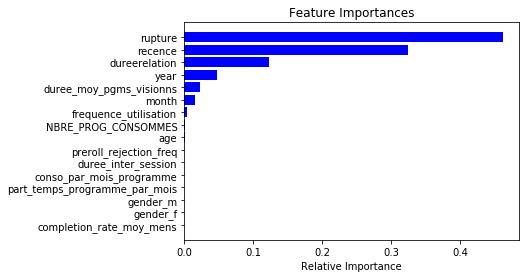

In [24]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [25]:
#keras expects model inputs to be numpy arrays - not pandas.DataFrames. 
X_train=X_train.as_matrix()
y_train=y_train.as_matrix()
X_test=X_test.as_matrix()
y_test=y_test.as_matrix()
#As as_matrix method converts pandas.DataFrame to a numpy.array.

In [53]:
from keras.layers import Dense
from keras.models import load_model

model = load_model("deep_network.HDF5")
model.fit(X_train, y_train, epochs=30, batch_size=20, verbose=2)
print(model.summary())

Epoch 1/30
 - 1s - loss: 0.2312 - acc: 0.9779
Epoch 2/30
 - 1s - loss: 0.2294 - acc: 0.9782
Epoch 3/30
 - 1s - loss: 0.2378 - acc: 0.9785
Epoch 4/30
 - 1s - loss: 0.1956 - acc: 0.9815
Epoch 5/30
 - 1s - loss: 0.2192 - acc: 0.9807
Epoch 6/30
 - 1s - loss: 0.1446 - acc: 0.9854
Epoch 7/30
 - 1s - loss: 0.1308 - acc: 0.9869
Epoch 8/30
 - 1s - loss: 0.1492 - acc: 0.9854
Epoch 9/30
 - 1s - loss: 0.1385 - acc: 0.9863
Epoch 10/30
 - 1s - loss: 0.1082 - acc: 0.9891
Epoch 11/30
 - 1s - loss: 0.0991 - acc: 0.9890
Epoch 12/30
 - 1s - loss: 0.0993 - acc: 0.9887
Epoch 13/30
 - 1s - loss: 0.0797 - acc: 0.9906
Epoch 14/30
 - 1s - loss: 0.1138 - acc: 0.9893
Epoch 15/30
 - 1s - loss: 0.0753 - acc: 0.9921
Epoch 16/30
 - 1s - loss: 0.0728 - acc: 0.9929
Epoch 17/30
 - 1s - loss: 0.0667 - acc: 0.9934
Epoch 18/30
 - 1s - loss: 0.0925 - acc: 0.9914
Epoch 19/30
 - 1s - loss: 0.0600 - acc: 0.9935
Epoch 20/30
 - 1s - loss: 0.0693 - acc: 0.9929
Epoch 21/30
 - 1s - loss: 0.0756 - acc: 0.9925
Epoch 22/30
 - 1s - lo

In [54]:
# summarize performance of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Model Accuracy: 99.93%


In [28]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Epoch 1/1
22398/22398 [==============================] - 1s 28us/step - loss: 8.1022 - acc: 0.4973

In [29]:
accuracy_score(y_test, prediction.round(), normalize=False)

4824

In [30]:
model.predict_proba(X_test).shape

(9600, 1)

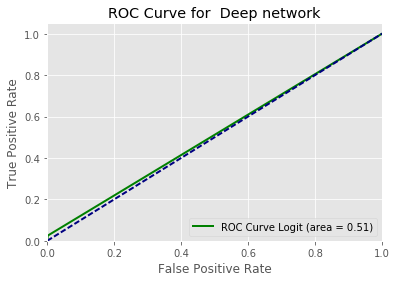

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_roc_curve(my_model, index, modelname = ""):
    y_predict_probabilities = my_model.predict_proba(X_test)[:,index]
    fpr_, tpr_, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc_ = auc(fpr_, tpr_)

    plt.figure()
    plt.plot(fpr_, tpr_, color='green',
             lw=2, label='ROC Curve Logit (area = %0.2f)' % roc_auc_)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if modelname == "":
        modelname = str(type(my_model)).split('.')[-1][:-2]
    plt.title('ROC Curve for ' + modelname )
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(model,0, ' Deep network')

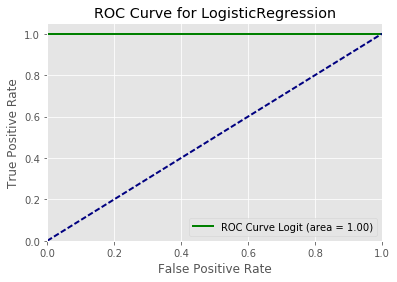

In [32]:
plot_roc_curve(log_reg, 1)

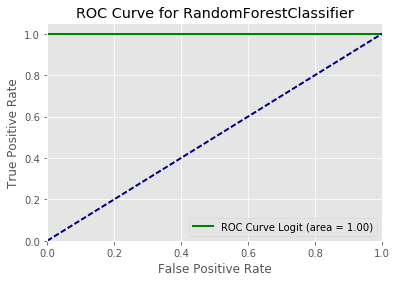

In [33]:
plot_roc_curve(rfc, 1)

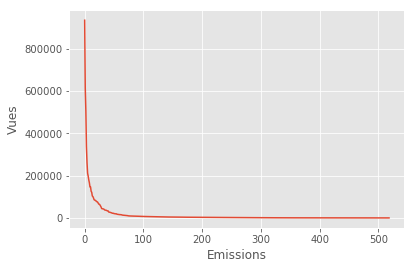

In [34]:
a=db_emissions['prgm_title'].value_counts()
len(a)
b=np.arange(0,len(a))
a
plt.plot(b,a)
plt.xlabel('Emissions')
plt.ylabel('Vues')
plt.show()

def part_de_marche(n):
    b=0
    for i in range(n):
        b+=a[i]
    #print('pourcentage de vues avec ',n, 'emissions : ',b/sum(a))
    return(b)


def plot_part_marche(p):
    
    aa=np.arange(0,p)
    m=0
    for i in range(p):
        aa[m]= part_de_marche(i)
        m+=1
    plt.plot(np.arange(0,p),aa/sum(a), color='b')
    plt.axhline(y=0.9, color='r', linestyle='-')
    plt.show()

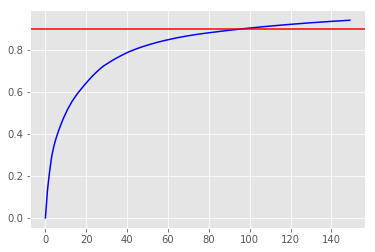

In [35]:
plot_part_marche(150)